Observations of the SEI Model at different cycles for different initial thicknesses

In [19]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
param = pybamm.ParameterValues("Chen2020")
# param = pybamm.ParameterValues("ORegan2022")
# param

/home/kawamanmi/Projects/PyBaMM


In [20]:
param['Initial inner SEI thickness [m]'] = 1e-15
param['Initial outer SEI thickness [m]'] = 1e-15
# param['Inner SEI open-circuit potential [V]'] = 0.3
# param

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x7fa540a6b520>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x7fa540a6b490>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial conce

In [21]:

cycle_no = 5
exp_CCCV = pybamm.Experiment(
    [("Charge at C/10 until 4.2 V",
      "Rest for 10 hours",
      "Discharge at C/10 until 2.5 V",
      # "Rest for 5 hours",
      )] * cycle_no
)

In [22]:

# sei_models = ["electron-migration limited"]

# sei_models = ["interstitial-diffusion limited"]
sei_models = ["ec reaction limited", "reaction limited",
              "solvent-diffusion limited", "interstitial-diffusion limited", "electron-migration limited"]

# Diffferent SEI models can be used, by setting the index of sei_models

name_models = ["SPM"]
models_SPM = [pybamm.lithium_ion.SPM(options={
    "SEI": sei_models[index],


},
    name=sei_models[index]) for index in range(len(sei_models))
]

In [23]:

models_SPM[0].variable_names()
pybamm.settings.max_y_value = 1000000000

In [24]:

# please note that the size of sims will be equal to the number of models times the number of experiments
from pybamm.models import event


solver = pybamm.CasadiSolver(mode="safe")
# solver = pybamm.ScipySolver(atol=1e-8, rtol=1e-8)
# solver = pybamm.IDAKLUSolver()
sims_SPM = [pybamm.Simulation(model, parameter_values=param,
                              experiment=exp_CCCV, solver=solver) for model in models_SPM]

In [25]:
sols_SPM = [sim.solve(initial_soc=0) for sim in sims_SPM]

In [26]:
# Vaiables to be postprocessed, you can add as many as output variables to the following list
# you can find the list variables to be be output by typing model name dot varaible_name() e.g. here, models[0].variable_names()
out_vars = [  # 'X-averaged negative particle surface concentration [mol.m-3]',
    # "Voltage [V]",
    # 'X-averaged negative SEI thickness [m]',
    'Discharge capacity [A.h]'
    # 'Total capacity lost to side reactions [A.h]',
    # 'Loss of lithium to SEI [mol]',
    'Total current density [A.m-2]',
    # 'X-averaged outer SEI thickness [m]',
    # 'X-averaged negative electrode porosity',
]

# Label for the output variables y-axis in the plots
yaxis_labels = ["SEI_thickness",
                'Total capacity lost to side reactions [A.h]', 'Total lithium in particles', 'X-averaged inner SEI thickness [m]',
                'X-averaged outer SEI thickness [m]',]

In [27]:
# from matplotlib import lines

# for sol in sols_SPM:  # loop through the solutions of the DFN models
#     LS_cycles = [sol.cycles[k].steps[2]['X-averaged SEI thickness [m]'].entries[-1]
#                  for k in range(cycle_no)]
#     plt.scatter(np.arange(1, cycle_no+1), LS_cycles,
#                 label=models_SPM[sols_SPM.index(sol)].name)
# plt.xlabel("Cycle number")
# plt.ylabel("SEI thickness [m]")
# plt.legend()
# plt.show()

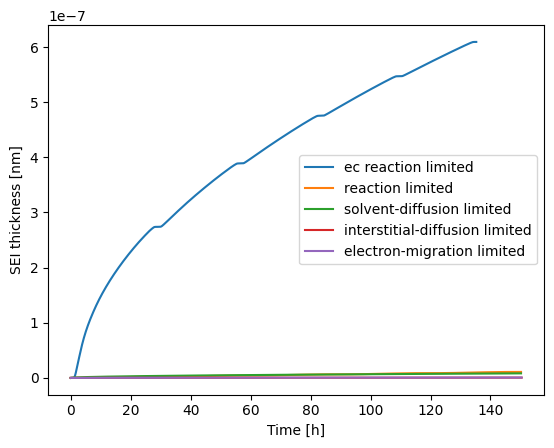

In [28]:
# plt.plot(sols_SPM[0].t, sols_SPM[0]
#          ['X-averaged negative electrode SEI interfacial current density [A.m-2]'].entries)
# plt.show()
dd = len(sei_models)
# print(dd)
# for j in range(dd):
#     plt.plot(sols_SPM[j].t/3600, sols_SPM[j]
#              ['X-averaged negative electrode SEI interfacial current density [A.m-2]'].entries, label=models_SPM[j].name)
# plt.legend()
# plt.show()

# for j in range(dd):
#     if (j == dd):
#         plt.plot(sols_SPM[j].t/3600, sols_SPM[j]
#                  ['X-averaged negative electrode SEI film overpotential [V]'].entries, label=models_SPM[j].name)
#     else:
#         plt.plot(sols_SPM[j].t/3600, sols_SPM[j]
#                  ['X-averaged negative electrode SEI film overpotential [V]'].entries, label=models_SPM[j].name)
# plt.legend()
# plt.show()

for j in range(dd):
    # if (j == dd-2):
    #     plt.plot(sols_SPM[j].t/3600, sols_SPM[j]
    #              ['X-averaged negative total SEI thickness [m]'].entries, label=models_SPM[j].name + "/100")
    # else:
    plt.plot(sols_SPM[j].t/3600, sols_SPM[j]
             ['X-averaged negative total SEI thickness [m]'].entries, label=models_SPM[j].name)
plt.xlabel("Time [h]")
plt.ylabel("SEI thickness [nm]")
plt.legend()
plt.show()

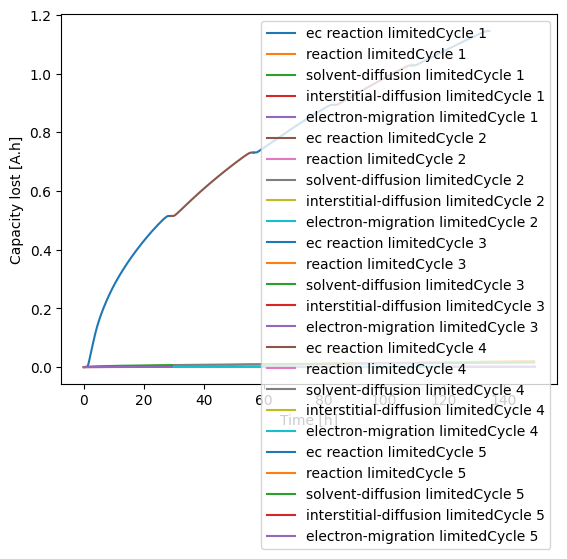

In [29]:


for j in range(cycle_no):
    for sol in sols_SPM:  # loop through the solutions of the DFN models
        total_capacity_lost = sol.cycles[j]['Total capacity lost to side reactions [A.h]'].entries
        L_sei = sol.cycles[j]['X-averaged negative total SEI thickness [m]'].entries
        # print(L_sei[-1] - L_sei[0])
        plt.plot(sol.cycles[j]["Time [h]"].entries, total_capacity_lost,
                 label=sei_models[sols_SPM.index(sol)] + "Cycle " + str(j+1))
plt.xlabel("Time [h]")
plt.ylabel("Capacity lost [A.h]")
plt.legend()
# plt.title("Cycle " + sei_models[sols_SPM.index(sol)])
plt.show()

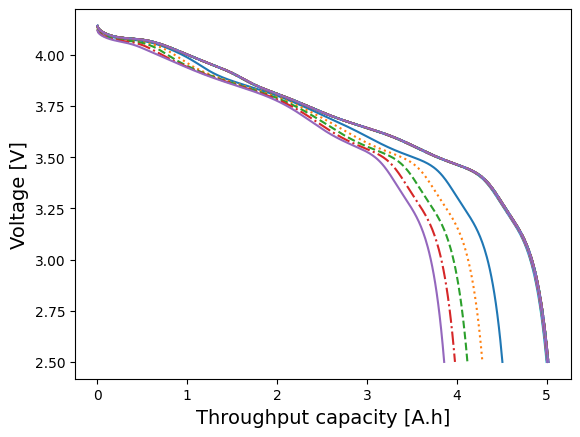

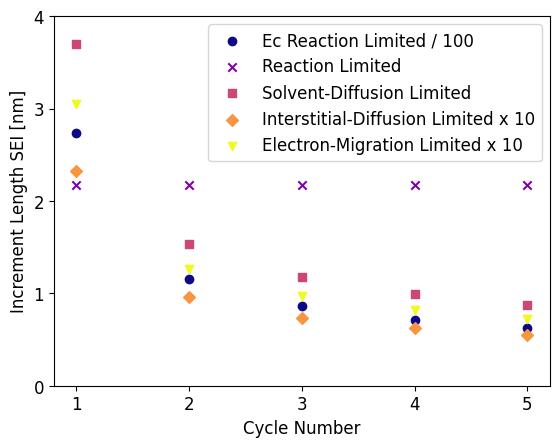

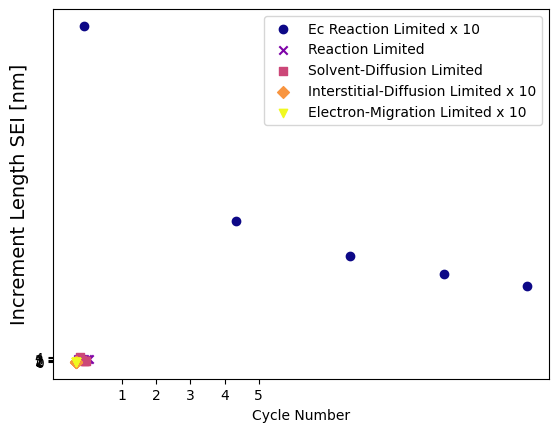

[90.12428916675128, 85.67625269298283, 82.33793891557987, 79.56894062135905, 77.16677810890438, 100.28096500179377, 100.19966024024245, 100.11839351114536, 100.03716969172191, 99.95598734247022, 100.2240771866215, 100.1666447570108, 100.12266794769909, 100.08561429891097, 100.05297972446283, 100.35306464980616, 100.3494550677021, 100.34669186826034, 100.34436371389243, 100.34231313595616, 100.35037118108627, 100.3456451548376, 100.34202474410235, 100.33897391183302, 100.33628655802735]


In [30]:
from pyparsing import line


line_style = ["-", ":", "--", "-.", "-"]
LL_SEIs = []
Dcs = []
for sol in sols_SPM:  # loop through the solutions of the DFN models
    for j in range(cycle_no):
        negative_current_indices = sol.cycles[j]['Current [A]'].entries > 0
        SoC = sol.cycles[j]['Throughput capacity [A.h]'].entries[negative_current_indices]
        vol = sol.cycles[j]["Voltage [V]"].entries[negative_current_indices]
        L_sei = sol.cycles[j]['X-averaged negative total SEI thickness [m]'].entries
        LL_SEIs.append(L_sei[-1] - L_sei[0])
        Dc = sol.cycles[j]['Discharge capacity [A.h]'].entries
        Dcs.append((SoC[-1]-SoC[0])/5*100)
        # negative_current_indices = sol.cycles[j]['Current [A]'].entries < 0
        # SoC = sol.cycles[j]['Discharge capacity [A.h]'].entries[negative_current_indices]
        # vol = sol.cycles[j]["Voltage [V]"].entries[negative_current_indices]
        plt.plot(SoC-SoC[0], vol,
                 label=sei_models[sols_SPM.index(sol)] + " cycle " + str(j+1), linestyle=line_style[j])
plt.xlabel('Throughput capacity [A.h]', fontsize=14)
plt.ylabel("Voltage [V]", fontsize=14)
# plt.legend()
# plt.title("Cycle " + sei_models[sols_SPM.index(sol)])
plt.show()

kk = 0
marker = ["o", "x", "s", "D", "v"]
# Create a list of distinct colors
colors = plt.cm.plasma(np.linspace(0, 1, len(sols_SPM)))

jj = np.arange(1, cycle_no + 1)
k1 = 0
k2 = len(jj)

for idx, sol in enumerate(sols_SPM):
    # Check if it's the last sol
    capitalized_label = sei_models[sols_SPM.index(sol)].title()
    if idx == 0:
        plt.scatter(jj, np.array(LL_SEIs[k1:k2]) / 100 * 1e9,
                    label=capitalized_label + " / 100",
                    marker=marker[sols_SPM.index(sol)],
                    color=colors[sols_SPM.index(sol)])
    elif idx == len(sols_SPM)-2 or idx == len(sols_SPM)-1:
        plt.scatter(jj, np.array(LL_SEIs[k1:k2])*10 * 1e9,
                    label=capitalized_label + " x 10",
                    marker=marker[sols_SPM.index(sol)],
                    color=colors[sols_SPM.index(sol)])
    else:
        plt.scatter(jj, np.array(LL_SEIs[k1:k2]) * 1e9,
                    label=capitalized_label,
                    marker=marker[sols_SPM.index(sol)],
                    color=colors[sols_SPM.index(sol)])

    k1 = k1 + cycle_no
    k2 = k2 + cycle_no

# Add a legend to the plot
plt.legend(fontsize=12)
plt.ylabel("Increment Length SEI [nm]", fontsize=12)
plt.xlabel("Cycle Number", fontsize=12)
plt.xticks(np.arange(1, cycle_no+1, 1), fontsize=12)
plt.yticks(np.arange(0, 5, 1), fontsize=12)
plt.savefig('/home/kawamanmi/Projects/figure.svg',
            format='svg', dpi=300, bbox_inches='tight')
plt.show()


jj = np.arange(1, cycle_no + 1)
k1 = 0
k2 = len(jj)

for idx, sol in enumerate(sols_SPM):
    # Check if it's the last sol
    capitalized_label = sei_models[sols_SPM.index(sol)].title()
    if idx == 0:
        plt.scatter((100-np.array(Dcs[k1:k2]))-10, np.array(LL_SEIs[k1:k2])/1 * 1e9,
                    label=capitalized_label + " x 10",
                    marker=marker[sols_SPM.index(sol)],
                    color=colors[sols_SPM.index(sol)])
    elif idx == len(sols_SPM)-2 or idx == len(sols_SPM)-1:
        plt.scatter(100-np.array(Dcs[k1:k2]), np.array(LL_SEIs[k1:k2]) * 1e9,
                    label=capitalized_label + " x 10",
                    marker=marker[sols_SPM.index(sol)],
                    color=colors[sols_SPM.index(sol)])
    else:
        plt.scatter(100 - np.array(Dcs[k1:k2]), np.array(LL_SEIs[k1:k2]) * 1e9,
                    label=capitalized_label,
                    marker=marker[sols_SPM.index(sol)],
                    color=colors[sols_SPM.index(sol)])

    k1 = k1 + cycle_no
    k2 = k2 + cycle_no
    plt.legend()
plt.ylabel("Increment Length SEI [nm]", fontsize=14)
plt.xlabel("Cycle Number")
plt.xticks(np.arange(1, cycle_no+1, 1))
plt.yticks(np.arange(0, 5, 1))
plt.show()
print(Dcs)

100.60992067143233
89.93127190309316
85.53541646746133
82.22083718726131
79.47019264454052
100.71902706554334
100.28005947613165
100.19872782220122
100.117434651212
100.03618489201335
100.71842482551139
100.22317140799916
100.16604600848144
100.12218127381018
100.0851912143137
100.71924898653602
100.35301025005326
100.34941982203638
100.34666365148293
100.34433944218422
100.719221925613
100.35030456688987
100.34560014383223
100.3419883283896
100.33894245416978


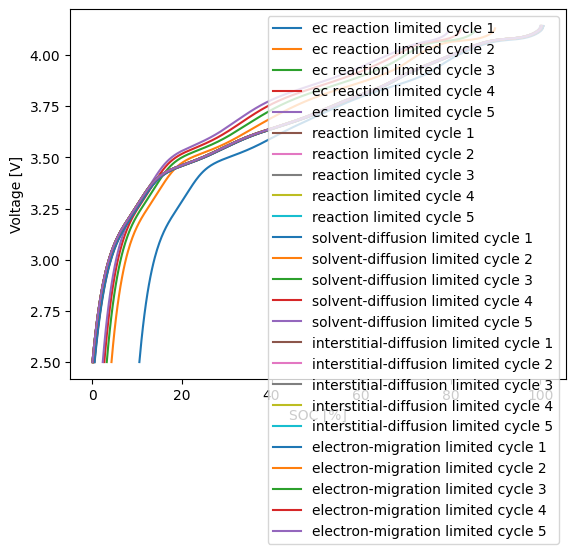

In [31]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Create a figure and axis for the main plot
fig, ax_main = plt.subplots()

# # Loop through cycles and solutions
for sol in sols_SPM:
    for j in range(cycle_no):
        negative_current_indices = sol.cycles[j]['Current [A]'].entries > 0
        SoC = sol.cycles[j]['Discharge capacity [A.h]'].entries[negative_current_indices]
        vol = sol.cycles[j]["Voltage [V]"].entries[negative_current_indices]
        print(np.abs(SoC[0]) / 5 * 100)
        ax_main.plot(np.abs(SoC) / 5 * 100, vol,
                     label=sei_models[sols_SPM.index(sol)] + " cycle " + str(j + 1))

# Set labels and legend for the main plot
ax_main.set_xlabel("SOC [%]")
ax_main.set_ylabel("Voltage [V]")
ax_main.legend()

# # Create a subplot for magnification
# # Adjust the coordinates and size as needed
# ax_magnify = plt.axes([0.2, 0.6, 0.25, 0.25])

# # Plot the magnified section (voltage between 2.5 and 2.75)

# for sol in sols_SPM:
#     for j in range(cycle_no):
#         negative_current_indices = sol.cycles[j]['Current [A]'].entries < 0
#         SoC = sol.cycles[j]['Discharge capacity [A.h]'].entries[negative_current_indices]
#         vol = sol.cycles[j]["Voltage [V]"].entries[negative_current_indices]

#         # Only plot the desired voltage range in the magnified subplot
#         voltage_range_mask = (vol >= 2.5) & (vol <= 2.75)
#         ax_magnify.plot(np.abs(SoC[voltage_range_mask]) /
#                         5 * 100, vol[voltage_range_mask])

# # Set labels for the magnified subplot
# ax_magnify.set_xlabel("SOC [%]")
# ax_magnify.set_ylabel("Voltage [V]")
# ax_magnify.set_title("Magnified View (Voltage between 2.5 and 2.75)")

# # Show the plots
# plt.show()

In [32]:
# from matplotlib import lines


# for out_var in out_vars:  # Loop through the output variables
#     for sol in sols_SPM:  # loop through the solutions of the SPM models
#         plt.plot(sol['Time [h]'].entries, sol[out_var].entries,
#                  linestyle='--',
#                  label=models_SPM[sols_SPM.index(sol)].name)

#     plt.xlabel("Time [h]")
#     plt.ylabel(yaxis_labels[out_vars.index(out_var)])
#     plt.legend()
#     plt.show()